<center>
    
    COMP4240/5435 - Reinforcement Learning
    
# Homework 1 - K-armed Bandit Algorithms
    
</center>

Student name: _Harshal Dafade_

The purpose of this homework is to study different properties of multi-armed bandit algorithms.

In [2]:
# You are only allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt


**General Notes:**
- Do not use a mix of python lists and numpy arrays. Every vector or matrix in your code should be a numpy array. 
- For functions that exist in both the python core and the numpy library, use the one in the numpy library. For example, use `np.max` instead of `max`. Another example: use `np.random.normal` instead of `random.gauss`.
- Make sure all of your plots have a proper size and include `xlabel`, `ylabel`, `legend`, `title`, and `grid`.

### Part 1 - Bandit Class [20 pts]
(a) Implement a bandit class, by completing the following code. This class should at least have two functions, one for returning the number of arms, and the other for pulling a given arm and returning a reward [10pts]. 

In [3]:
# this is your Bandit class. Complete the code.
class Bandit:
    def __init__(self, means, sigmas) -> None:
        self.sigmas = sigmas
        self.means = means

    def K(self):
        #--- Your code here ---#
        # complete the function to return number of arms
        return len(self.sigmas)

    def pull(self, k):
        #--- Your code here ---#
        # complete the function to return a reward for the selected arm 
        # using a normal distribution with the given mean and sigma
        return np.random.normal(self.means[k],self.sigmas[k])

(b) Test your Bandit class on a 2-armed bandit with true arm values [-1, 1] (i.e. means) and variance of 1.0. Instantiate your Bandit class and use it to get the number of arms, $K$. Then pull the first arm 1000 times and report the mean of the total reward you received [10pts].

In [4]:
# instantiate the Bandit class with the given parameters
#--- Your code here ---#
means=[-1,1]
sigmas=[1.0, 1.0]
bandit= Bandit(means,sigmas)

# print the numner of arms
#--- Your code here ---#
num_arms = bandit.K()
print("Number of arms:", num_arms)

# calculate and print the mean for playing the first arm 1000 times
#--- Your code here ---#
rewards1 = [bandit.pull(0) for i in range(1000)]
mean_reward1 = np.mean(rewards1)
rewards2 = [bandit.pull(1) for i in range (1000)]
mean_reward2 = np.mean(rewards2)
print("Mean reward for 1st arm 1000 steps:", mean_reward1)
print("Mean reward for 2nd arm 1000 steps:", mean_reward2)


Number of arms: 2
Mean reward for 1st arm 1000 steps: -0.9805992919414277
Mean reward for 2nd arm 1000 steps: 1.0188912979865696


### Part 2 - Policy Class [40 pts]

(a) Make a *random* policy class that selects arms randomly using the following template. Your class should have: (i) a reset function for resetting the estimations, $Q$ and the number of times each arm was selected $N$, (ii) a function for selecting an arm using the current estimate $Q$, (iii) and a function that updates the estimate $Q$ according to the incremental averaging method [10pts]. 

In [5]:
class RandomPolicy:
    def __init__(self, K) -> None:
        self.K = K
        self.reset()

    def reset(self):
        #--- Your code here ---#
        # initialize/reset estimates N, Q
        self.N = np.zeros(self.K) 
        self.Q = np.zeros(self.K) 

    def choose_arm(self, t):
        #--- Your code here ---#
        # complete the function to choose an arm. 
        # you might not need to pass the argument t but do not remove it yet
        return np.random.randint(0, self.K) 

    def update_estimate(self,k, r):
        #--- Your code here ---#
        # update estimates for Q and N using the incremental averaging
        self.N[k]+=1 
        self.Q[k]+=(r - self.Q[k]) / self.N[k]


(b) Similarly, implement a *UCB* policy class. Compared to the random policy class, the only difference would be in the arm selection strategy where you should use the UCB strategy [10pts].

In [6]:
class UCBPolicy:
    def __init__(self, K, c=1.0):
        self.c=c
        self.K=K
        self.reset()

    def reset(self): 
        self.N=np.zeros(self.K)
        self.Q=np.zeros(self.K)

    def choose_arm(self,t):
        if t<self.K:
            return t
        ucb_values = self.Q + self.c * np.sqrt(np.log(t + 1) / (self.N))
        return np.argmax(ucb_values)
    
    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]



(c) Similarly, implement an $\epsilon-$greedy policy class. The only difference would be in the arm selection strategy where you should use the $\epsilon-$greedy strategy [10pts].

In [7]:
class EpsilonGreedyPolicy:
    
    def __init__(self, K, epsilon=0.1):
        self.K = K
        self.epsilon = epsilon
        self.reset()

    def reset(self):
        self.Q = np.zeros(self.K) 
        self.N = np.zeros(self.K)

    def choose_arm(self, t):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.K)
        else:
            return np.argmax(self.Q)

    def update_estimate(self, k, r):
        self.N[k] += 1
        self.Q[k] += (r - self.Q[k]) / self.N[k]
    

(d) Test your policy classes on a 2-armed bandit with means [0.1, 1] and variance 1.0. First write a function that plays a given bandit using a given policy for a certain number of time-steps and returns a reward history (a numpy array). Instantiate three policy classes you developed (random, ucb, and $\epsilon-$greedy). Then plot reward history for all three plays in one plot. Hint: this plot will look noisy [10pts].

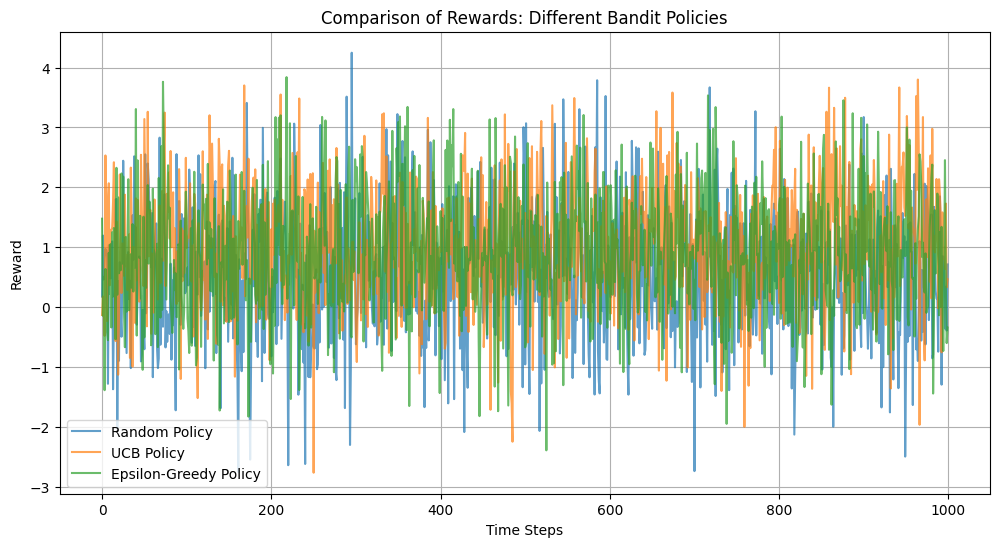

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def play(bandit, policy, time_steps):
    rewards = np.zeros(time_steps)
    for t in range(time_steps):
        arm = policy.choose_arm(t)
        reward = bandit.pull(arm)
        policy.update_estimate(arm, reward)
        rewards[t] = reward
    return rewards

means = [0.1, 1.0]
variances = [1.0, 1.0]
bandit = Bandit(means, variances)
steps = 1000

random_policy = RandomPolicy(bandit.K())
ucb_policy = UCBPolicy(bandit.K())
epsilon_greedy_policy = EpsilonGreedyPolicy(bandit.K())

random_policy_rewards = play(bandit, random_policy, steps)
ucb_policy_rewards = play(bandit, ucb_policy, steps)
epsilon_greedy_rewards = play(bandit, epsilon_greedy_policy, steps)

plt.figure(figsize=(12, 6))
plt.plot(random_policy_rewards, label='Random Policy', alpha=0.7)
plt.plot(ucb_policy_rewards, label='UCB Policy', alpha=0.7)
plt.plot(epsilon_greedy_rewards, label='Epsilon-Greedy Policy', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('Reward')
plt.title('Comparison of Rewards: Different Bandit Policies')
plt.legend()
plt.grid(True)
plt.show()




### Part 3 - Testbed [40]

(a) build a testbed by generating 500 randomly selected 7-armed bandits. For each bandit problem, select the true arm value ($Q^*$) from a Gaussian distribution with mean 0.0 and variance 1.0. For each selected action $a$, the bandit should return an actual reward from a Gaussian distribution with mean $Q^*(a)$ and variance 1.0. Our goal is to evaluate the three policies that we developed by averaging their performance over the 500 bandit problems. In other words, using each policy, we play each generated 7-armed bandit for 1000 steps. Then for each policy, we average the results over the 500 generated 7-armed bandits.

Note that we refer to one run as playing a single bandit problem for a certain number of time steps. Therefore, in this case, one run includes 1000 time-steps.

You should get results for the following scenarios:

1. using random policy
2. using greedy policy
3. using $\epsilon-$greedy policy with $\epsilon=0.1$ and $\epsilon=0.01$
4. using upper-confidence bound policy with $c=1$ and $c=2$

For all the 6 scenarios, plot the average reward (averaged over the 500 different bandits) [20pts].

### Part 3 - Testbed [40]

(a) build a testbed by generating 500 randomly selected 7-armed bandits. For each bandit problem, select the true arm value ($Q^*$) from a Gaussian distribution with mean 0.0 and variance 1.0. For each selected action $a$, the bandit should return an actual reward from a Gaussian distribution with mean $Q^*(a)$ and variance 1.0. Our goal is to evaluate the three policies that we developed by averaging their performance over the 500 bandit problems. In other words, using each policy, we play each generated 7-armed bandit for 1000 steps. Then for each policy, we average the results over the 500 generated 7-armed bandits.

Note that we refer to one run as playing a single bandit problem for a certain number of time steps. Therefore, in this case, one run includes 1000 time-steps.

You should get results for the following scenarios:

1. using random policy
2. using greedy policy
3. using $\epsilon-$greedy policy with $\epsilon=0.1$ and $\epsilon=0.01$
4. using upper-confidence bound policy with $c=1$ and $c=2$

For all the 6 scenarios, plot the average reward (averaged over the 500 different bandits) [20pts].

### Part 3 - Testbed [40]

(a) build a testbed by generating 500 randomly selected 7-armed bandits. For each bandit problem, select the true arm value ($Q^*$) from a Gaussian distribution with mean 0.0 and variance 1.0. For each selected action $a$, the bandit should return an actual reward from a Gaussian distribution with mean $Q^*(a)$ and variance 1.0. Our goal is to evaluate the three policies that we developed by averaging their performance over the 500 bandit problems. In other words, using each policy, we play each generated 7-armed bandit for 1000 steps. Then for each policy, we average the results over the 500 generated 7-armed bandits.

Note that we refer to one run as playing a single bandit problem for a certain number of time steps. Therefore, in this case, one run includes 1000 time-steps.

You should get results for the following scenarios:

1. using random policy
2. using greedy policy
3. using $\epsilon-$greedy policy with $\epsilon=0.1$ and $\epsilon=0.01$
4. using upper-confidence bound policy with $c=1$ and $c=2$

For all the 6 scenarios, plot the average reward (averaged over the 500 different bandits) [20pts].

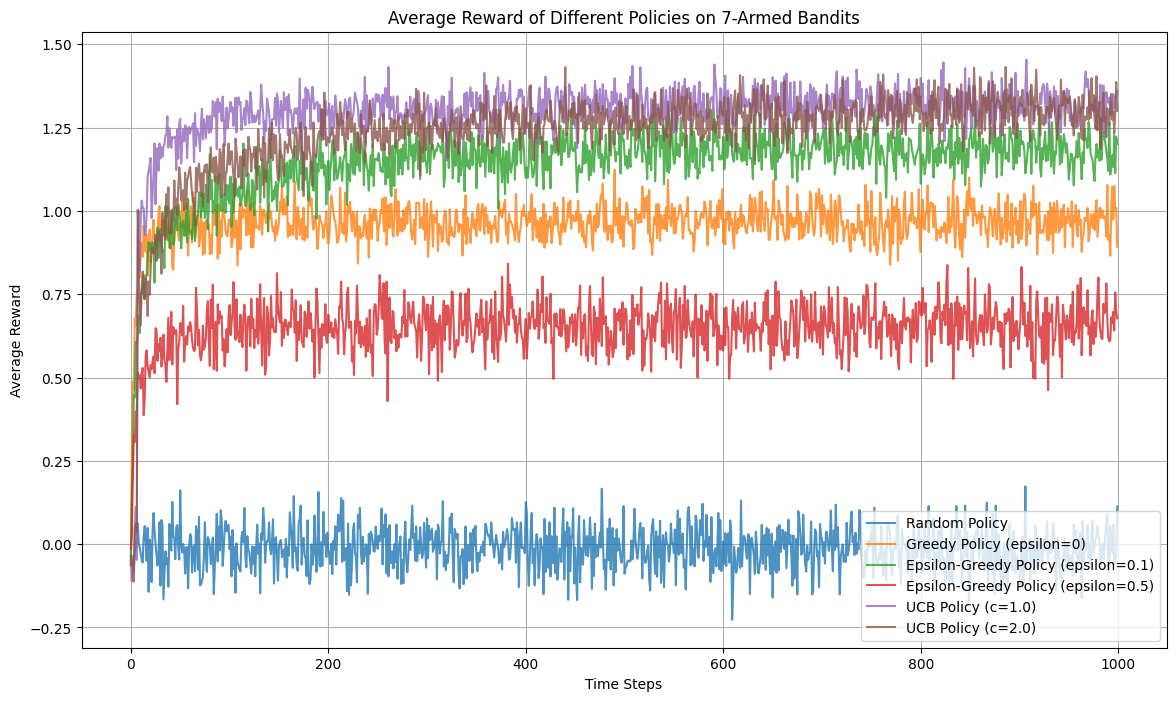

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def generate_bandit(mean, sigma, num_arms):
    return np.random.normal(mean, sigma, num_arms)

def testbed_experiment(num_bandits=500, num_steps=1000, num_arms=7):
    total_rewards_random = np.zeros(num_steps)
    total_rewards_greedy = np.zeros(num_steps)
    total_rewards_epsilon_01 = np.zeros(num_steps)
    total_rewards_epsilon_05 = np.zeros(num_steps)
    total_rewards_ucb_1 = np.zeros(num_steps)
    total_rewards_ucb_2 = np.zeros(num_steps)

    for i in range(num_bandits):
        means = generate_bandit(0.0, 1.0, num_arms)
        bandit = Bandit(means, np.ones(num_arms))

        random_policy = RandomPolicy(num_arms)
        greedy_policy = EpsilonGreedyPolicy(num_arms, epsilon=0.0)
        epsilon_greedy_01 = EpsilonGreedyPolicy(num_arms, epsilon=0.1)
        epsilon_greedy_05 = EpsilonGreedyPolicy(num_arms, epsilon=0.5)
        ucb_policy_1 = UCBPolicy(num_arms, c=1.0)
        ucb_policy_2 = UCBPolicy(num_arms, c=2.0)

        total_rewards_random += play(bandit, random_policy, num_steps)
        total_rewards_greedy += play(bandit, greedy_policy, num_steps)
        total_rewards_epsilon_01 += play(bandit, epsilon_greedy_01, num_steps)
        total_rewards_epsilon_05 += play(bandit, epsilon_greedy_05, num_steps)
        total_rewards_ucb_1 += play(bandit, ucb_policy_1, num_steps)
        total_rewards_ucb_2 += play(bandit, ucb_policy_2, num_steps)

    avg_rewards_random = total_rewards_random / num_bandits
    avg_rewards_greedy = total_rewards_greedy / num_bandits
    avg_rewards_epsilon_01 = total_rewards_epsilon_01 / num_bandits
    avg_rewards_epsilon_05 = total_rewards_epsilon_05 / num_bandits
    avg_rewards_ucb_1 = total_rewards_ucb_1 / num_bandits
    avg_rewards_ucb_2 = total_rewards_ucb_2 / num_bandits

    plt.figure(figsize=(14, 8))
    plt.plot(avg_rewards_random, label='Random Policy', alpha=0.8)
    plt.plot(avg_rewards_greedy, label='Greedy Policy (epsilon=0)', alpha=0.8)
    plt.plot(avg_rewards_epsilon_01, label='Epsilon-Greedy Policy (epsilon=0.1)', alpha=0.8)
    plt.plot(avg_rewards_epsilon_05, label='Epsilon-Greedy Policy (epsilon=0.5)', alpha=0.8)
    plt.plot(avg_rewards_ucb_1, label='UCB Policy (c=1.0)', alpha=0.8)
    plt.plot(avg_rewards_ucb_2, label='UCB Policy (c=2.0)', alpha=0.8)
    plt.xlabel('Time Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward of Different Policies on 7-Armed Bandits')
    plt.legend()
    plt.grid(True)
    plt.show()

testbed_experiment()




(b) answer the following question [20pts]:

1. which action selection method performs worse than others? why?
> Answer: Random policy performs the worst as it randomly explores and never really exploits the better arm as it randomly keeps choosing arms while all the other methods are trying to search for the arms with the better reward or highest mean in this case.

2. Which $\epsilon$ value improves faster? What is the best average reward value?
> Answer: epsilon=0.1 improves faster and performs better compared to epsilon=0.5, visible from the graph. It does so by having a good balance between exploration and exploitation. Meanwhile, epsilon=0.1 exploits the better arm 90% of the time and explores the other 10% randomly. Epsilon=0.5 does explore randomly 50% of the time, making it perform poorly. From the graph we see the best average reward value is close and a little shy of 1.5 

3. Which $\epsilon$ value will perform best in the long run in terms of cumulative reward and probability of selecging the best action? How much better will it be?
> Answer: epsilon=0.1 will perform better in long run in terms of cumulative reward, as I stated in my previous answer it strikes a good balance of exploration and exploitation as opposed to epsilon=0.5 which is making random chances 50% of the time. Both will converge and find the better arm eventually, but epsilon=0.5 will also keep choosing random arms half the time decreasing its cumulative reward while the epsilon=1 arm will only choose randomly 10% of time. To put things in perspective and understand in terms of numbers.
As the mean of all arms is 0 lets assume for randomly choosing an arm you get reward=0.
Also the best average reward is close to 1.5. Lets assume the arm with highest mean is 1.5 so reward for choosing best arm eventually be reward=1.5
when both arms converge and find the better arm their cumulative rewards will start looking like:
for epsilon=0.1: (1.5 * 0.9) + (0 * 0.1) = 1.35 . For epsilon=0.5: (1.5 * 0.5) + (0 * 0.5) = 0.75 .
This roughly gives us an idea of how much better it will be.

4. What is the different between $c=1$ and $c=2$ in the results? Why?
> Answer: c=1 performs better as it gives lesser weightage to the exploratory part of the equation. Due to this, it converges faster and steadily towards the optimal arm. While c=2 puts stronger weightage on exploratory term, which leads to slower convergence to optimal arm. In this case both did well, but there could be cases where lower c value may miss out on choosing the optimal solution. Higher c value converges slower but in some cases may save from choosing suboptimal solution

5. Why is there a performance spike on the 8th step of the UCB method?
> Anser: As visible in the code for the first 7 time steps our UCB policy explores all the 7 arms one by one after 7th step it exits that loop and has enough initial estimates as it has explored all the arms once. The sudden spike on 8th step represents the transition from purely exploring arms to finally start using UCB to exploit and explore arms.




### Part 4 - Extra Credit [20]

(a) Implement the Gradient Bandit Algorithm and plot the average reward and %optimal action graphs for the testbed you developed according to the following settings:

(a) using $\alpha=0.01$, $\alpha=0.1$, and $\alpha=0.5$
(b) using no reward baseline, reward baseline of +5, reward baseline of +10

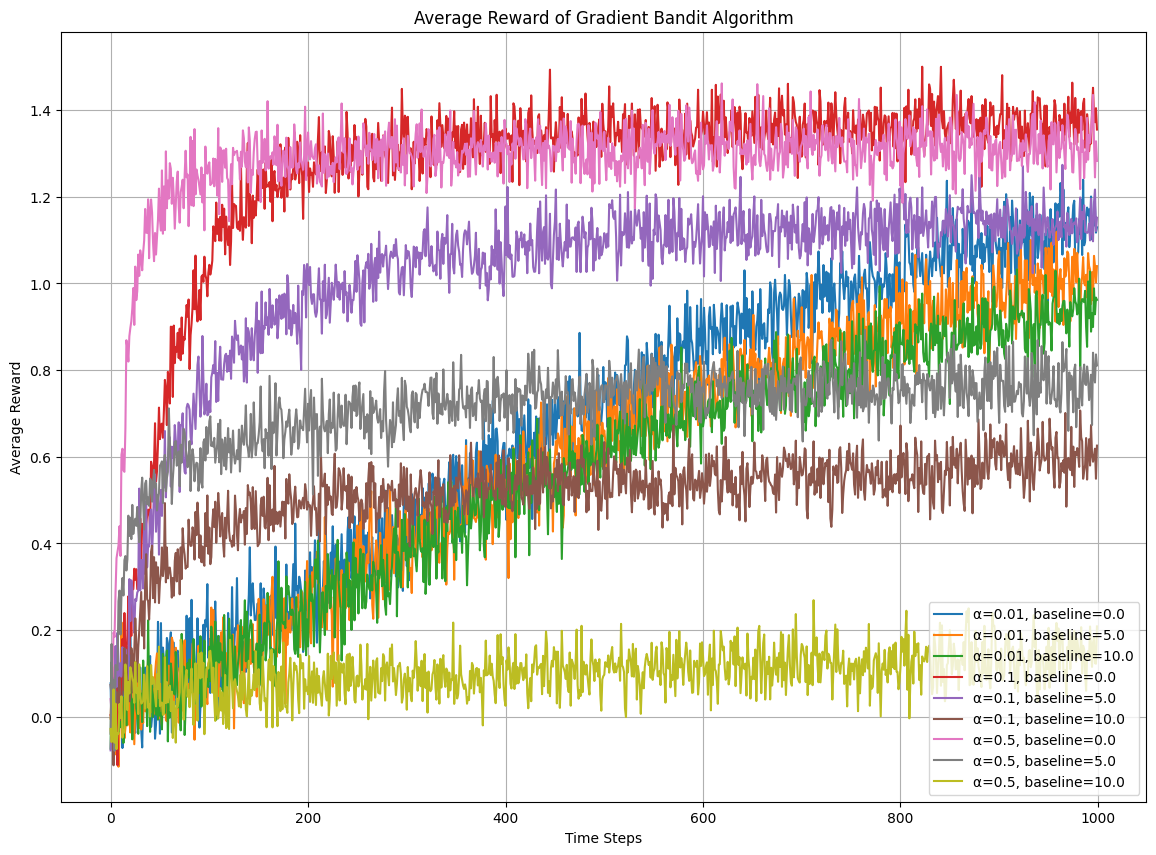

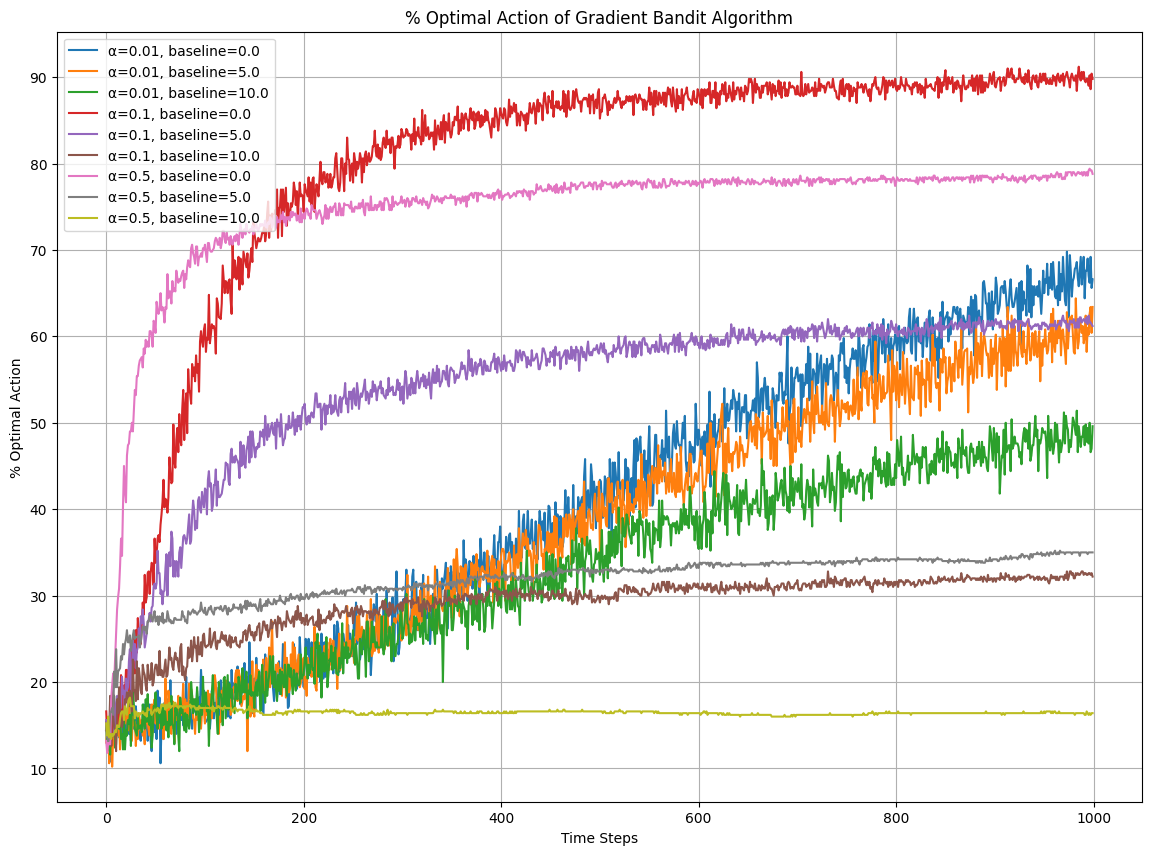

In [30]:
import numpy as np
import matplotlib.pyplot as plt

class GradientBandit:
    def __init__(self, K, alpha=0.1, baseline=0.0):
        self.K = K
        self.alpha = alpha
        self.baseline = baseline
        self.reset()

    def reset(self):
        self.preferences = np.zeros(self.K)
        self.probabilities = np.ones(self.K) / self.K
        self.average_reward = 0.0
        self.step_count = 0

    def choose_arm(self):
        self.probabilities = np.exp(self.preferences) / np.sum(np.exp(self.preferences))
        return np.random.choice(self.K, p=self.probabilities)

    def update(self, chosen_arm, reward):
        self.step_count += 1
        if self.baseline == 0.0:
            self.average_reward += (reward - self.average_reward) / self.step_count
        baseline_value = self.average_reward if self.baseline == 0.0 else self.baseline

        for i in range(self.K):
            if i == chosen_arm:
                self.preferences[i] += self.alpha * (reward - baseline_value) * (1 - self.probabilities[i])
            else:
                self.preferences[i] -= self.alpha * (reward - baseline_value) * self.probabilities[i]

def generate_bandit(mean, sigma, num_arms):
    return np.random.normal(mean, sigma, num_arms)

def evaluate_gradient_bandit(alpha, baseline, num_bandits=500, num_steps=1000, num_arms=7):
    total_rewards = np.zeros(num_steps)
    optimal_action_counts = np.zeros(num_steps)

    for _ in range(num_bandits):
        means = generate_bandit(0.0, 1.0, num_arms)
        bandit = Bandit(means, np.ones(num_arms))
        optimal_action = np.argmax(means)
        policy = GradientBandit(num_arms, alpha, baseline)
        
        for t in range(num_steps):
            chosen_arm = policy.choose_arm()
            reward = bandit.pull(chosen_arm)
            policy.update(chosen_arm, reward)
            total_rewards[t] += reward
            if chosen_arm == optimal_action:
                optimal_action_counts[t] += 1

    avg_rewards = total_rewards / num_bandits
    percent_optimal = (optimal_action_counts / num_bandits) * 100
    return avg_rewards, percent_optimal

alphas = [0.01, 0.1, 0.5]
baselines = [0.0, 5.0, 10.0]
num_bandits = 500
num_steps = 1000

plt.figure(figsize=(14, 10))
for alpha in alphas:
    for baseline in baselines:
        avg_rewards, _ = evaluate_gradient_bandit(alpha, baseline, num_bandits, num_steps)
        plt.plot(avg_rewards, label=f'α={alpha}, baseline={baseline}')

plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward of Gradient Bandit Algorithm')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 10))
for alpha in alphas:
    for baseline in baselines:
        _, percent_optimal = evaluate_gradient_bandit(alpha, baseline, num_bandits, num_steps)
        plt.plot(percent_optimal, label=f'α={alpha}, baseline={baseline}')

plt.xlabel('Time Steps')
plt.ylabel('% Optimal Action')
plt.title('% Optimal Action of Gradient Bandit Algorithm')
plt.legend()
plt.grid(True)
plt.show()


(b) Answer the following questions:

1. How do you compare the effect of reward baseline (discuss all scenarios)?
> Answer: The higher reward baseline promotes more exploration as most of the rewards are always under the baseline which leads to more exploration and less exploitation. In some cases while this may work in favor in some having zero baseline usually helps reach convergence faster to the optimal action. However the higher baseline can often even help us by not letting us get stuck in local optima.

2. How do you compare the effect of the step size (discuss all scenarios)?
> Answer: smaller step size results into slower training but visibly get better with training as they maintain stability. While higher step size may lead to faster convergence there is always a possibility of overshooting. They can get very sensitive to outliers and may lead to unstable behaviour as clearly visible in graphs
